,Beginning Balance,Payment,Interest,Principal,Ending Balance
1,"500,000.00","-6,666.67","-3,333.33","-3,333.33","503,333.33"
2,"503,333.33","-6,630.23","-3,315.11","-3,315.11","506,648.45"
3,"506,648.45","-6,593.54","-3,296.77","-3,296.77","509,945.22"
4,"509,945.22","-6,556.61","-3,278.31","-3,278.31","513,223.52"
5,"513,223.52","-6,519.44","-3,259.72","-3,259.72","516,483.24"
6,"516,483.24","-6,482.02","-3,241.01","-3,241.01","519,724.25"
7,"519,724.25","-6,444.35","-3,222.17","-3,222.17","522,946.43"
8,"522,946.43","-6,406.42","-3,203.21","-3,203.21","526,149.64"


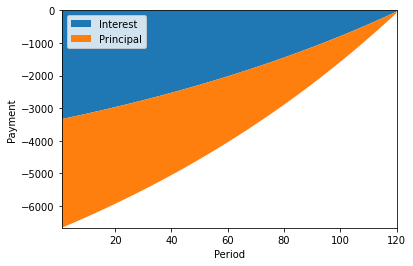

In [2]:
import pandas as pd
import numpy_financial as npf
import matplotlib.pyplot as plt
from collections import namedtuple


origin_balance = 500_000
coupon = 0.08
term = 120

periods = range(1, term + 1)
interest_payment = npf.ipmt(rate = coupon / 12 , per = periods, nper = term, pv = origin_balance)
principal_payment = npf.ipmt(rate = coupon / 12 , per = periods, nper = term, pv = origin_balance)

plt.stackplot(periods, interest_payment, principal_payment, 
              labels=['Interest', 'Principal'])
plt.legend(loc='upper left')
plt.xlabel("Period")
plt.ylabel("Payment")
plt.margins(0, 0)


pd.options.display.float_format = '{:,.2f}'.format

cf_data = {'Interest': interest_payment, 'Principal': principal_payment}
cf_table = pd.DataFrame(data=cf_data, index=periods)
cf_table['Payment'] = cf_table['Interest'] + cf_table['Principal']
cf_table['Ending Balance'] = origin_balance - \
                             cf_table['Principal'].cumsum()
cf_table['Beginning Balance'] = [origin_balance] + \
                                list(cf_table['Ending Balance'])[:-1]
cf_table = cf_table[['Beginning Balance', 'Payment', 'Interest', 
                     'Principal', 'Ending Balance']]
cf_table.head(8)